In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px


# # Step 1: Standardize the Data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df)

# # Step 2: Initialize and Apply PCA
# pca = PCA(n_components=2)
# pca_transformed_data = pca.fit_transform(scaled_data)

# # Convert the PCA results into a DataFrame
# pca_df = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2'])

# # Step 3: Create a Scatter Plot of the two principal components
# plt.figure(figsize=(8, 6))
# plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', marker='o')

# # Adding labels and title to the plot
# plt.title('PCA - 2 Principal Components')
# plt.xlabel('Principal Component 1 (PC1)')
# plt.ylabel('Principal Component 2 (PC2)')

# # Display the plot
# plt.grid(True)
# plt.show()


In [3]:
df = pd.read_csv('final_data.csv')

In [4]:
df['genre'].unique()

array(['electronica', 'indie', 'alternative rock', 'rock', 'alternative',
       'industrial', 'soft rock', 'r&b', nan, 'lounge', 'hip-hop',
       'electronic', 'black metal', 'indie pop', 'alternative country',
       'folk rock', 'folk', 'country', 'eurodance', 'new age', 'ambient',
       'trip-hop', 'hip hop', 'rap', 'german', 'accordion', 'happy',
       'psychedelic rock', 'nu metal', 'abstract', 'downtempo',
       'deathrock', 'k-pop', 'pop', 'indie rock', 'nu jazz', 'deathcore',
       'post-punk', 'emo', 'shoegaze', 'post-hardcore', 'piano',
       'singer-songwriter', 'new wave', 'punk', 'chill', 'doom metal',
       'acoustic', 'experimental', 'hardcore', 'chaotic hardcore',
       'slowcore', 'melodic hardcore', 'a cappella', 'progressive rock',
       'dream pop', 'spanish', 'psychill', 'post-rock', 'drum and bass',
       'trance', 'dance', 'industrial rock', 'soul', 'halloween', 'anime',
       'soundtrack', 'jazz', 'bluegrass', 'steampunk', 'metal',
       'death meta

In [5]:
numerical_columns_df = df.select_dtypes(include = ['float'])
categorical_columns_df = df.select_dtypes(exclude = ['float'])

In [6]:
numerical_columns_df.columns

Index(['rms', 'zcr', 'tempo_x', 'onset_strength', 'mfcc_1', 'mfcc_2', 'mfcc_3',
       'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10',
       'mfcc_11', 'mfcc_12', 'mfcc_13', 'spectral_contrast_1',
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'spectral_contrast_7',
       'artist_pop', 'track_pop', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo_y', 'duration_ms', 'time_signature', 'valence_tags',
       'arousal_tags', 'dominance_tags'],
      dtype='object')

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns_df)

In [19]:
numerical = pd.DataFrame(scaled_data, columns=numerical_columns_df.columns)

numerical['genre'] = df['genre']

In [27]:
numerical['genre'].isna().index

RangeIndex(start=0, stop=17640, step=1)

In [22]:
numerical.to_csv('musicDataModel.csv')

In [10]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_transformed_data = tsne.fit_transform(scaled_data)

In [11]:
tsne_df = pd.DataFrame(tsne_transformed_data, columns=['TSNE1', 'TSNE2'])

In [12]:
fig = px.scatter(x=tsne_transformed_data[:, 0], y=tsne_transformed_data[:, 1], color=df['genre'])
fig.update_layout(title="t-SNE Visualization", xaxis_title="Component 1", yaxis_title="Component 2")
fig.show()

In [13]:

fig = px.scatter(x=df['mfcc_1'], y=df['mfcc_2'], color=df['genre'])
fig.update_layout(title="Mfcc Comparision", xaxis_title="Component 1", yaxis_title="Component 2")
fig.show()


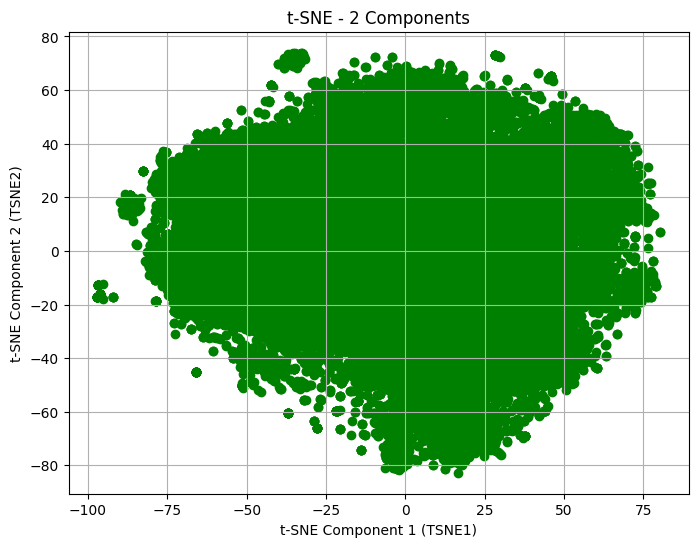

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c='green', marker='o')

# Adding labels and title to the plot
plt.title('t-SNE - 2 Components')
plt.xlabel('t-SNE Component 1 (TSNE1)')
plt.ylabel('t-SNE Component 2 (TSNE2)')

# Display the plot
plt.grid(True)
plt.show()

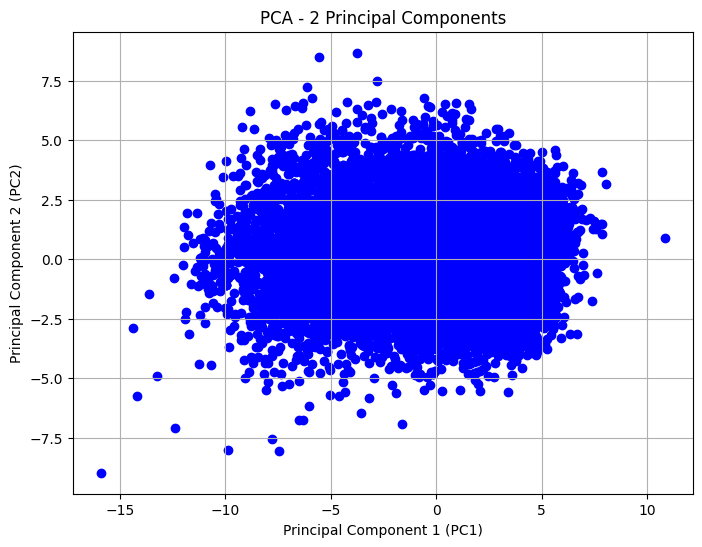

In [15]:
pca = PCA(n_components=2)
pca_transformed_data = pca.fit_transform(scaled_data)

# Convert the PCA results into a DataFrame
pca_df = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2'])

# Step 3: Create a Scatter Plot of the two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', marker='o')

# Adding labels and title to the plot
plt.title('PCA - 2 Principal Components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')

# Display the plot
plt.grid(True)
plt.show()

In [16]:
pca_df

,PC1,PC2
0,5.199244,-0.655325
1,4.646556,-0.252801
2,3.602712,1.720947
3,1.281388,-0.402668
4,-0.821562,-0.773162
...,...,...
17635,0.217729,2.073442
17636,4.614851,-0.828898
17637,3.256289,-0.185443
17638,-0.325209,0.998863
